# Part-1 
MNIST Project (binary classification, 5 vs non-5 classes)

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
y_train_5 = (y_train == '5')

In [5]:
import pandas as pd
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

### Importing Various binary classifiers 

In [6]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

In [7]:
np.random.seed(42)
# sgd_clf = SGDClassifier()
# log_reg = LogisticRegression(max_iter=1000)
# rf_clf = RandomForestClassifier()
# kn_clf = KNeighborsClassifier()
# svc_clf = SVC()

#### Evaluating Various Models

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def evaluate_models(models):
    for model in models:
        pipeline = make_pipeline(StandardScaler(), model)
        try:
            
            y_scores = cross_val_predict(
                pipeline, X_train, y_train_5, cv=3, method="decision_function"
            )
            y_preds = y_scores > 0

        except AttributeError:
            y_scores = cross_val_predict(
                pipeline, X_train, y_train_5, cv=3, method="predict_proba"
            )[:, 1]
            y_preds = y_scores > 0.5

        # Evaluate
        auc = roc_auc_score(y_train_5, y_scores)
        precision = precision_score(y_train_5, y_preds)
        recall = recall_score(y_train_5, y_preds)
        print(f"{model.__class__.__name__} -> auc = {auc}, precision = {precision}, recall = {recall}")

In [9]:
# evaluate_models([sgd_clf, rf_clf, kn_clf, svc_clf])

Without Scaling Results

`SGDClassifier -> auc = 0.9528478963485787, precision = 0.7221744366076036, recall = 0.7743958679210478`

`RandomForestClassifier -> auc = 0.9982926883782498, precision = 0.9888468013468014, recall = 0.8668142409149603`

`KNeighborsClassifier -> auc = 0.9950081362508942, precision = 0.970241437394722, recall = 0.9562811289429994`

`SVC -> auc = 0.9986234183864152, precision = 0.9842034290117511, recall = 0.9424460431654677`

With Scaling Results 

SGDClassifier -> auc = 0.9717892582331312, precision = 0.8651220521307406, recall = 0.7714443829551744
RandomForestClassifier -> auc = 0.998253975790992, precision = 0.9890549358029889, recall = 0.8668142409149603
KNeighborsClassifier -> auc = 0.9855076553363941, precision = 0.938479174627436, recall = 0.9061058845231507
SVC -> auc = 0.9968693231403573, precision = 0.9806094182825484, recall = 0.9142224681793027

In [10]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'weights': ['uniform', 'distance'],
#               'n_neighbors': [5, 10, 15, 20]}
# grid = GridSearchCV(kn_clf, param_grid, scoring='accuracy')
# grid.fit(X_train, y_train_5)

In [11]:
# grid.best_params_

Best parameters for `KNeighborsClassifier` - {'n_neighbors': 5, 'weights': 'uniform'}

In [12]:
kn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
y_scores = cross_val_predict(kn_clf, X_train, y_train_5,cv=3, method="predict_proba")

In [26]:
y_preds = (y_scores > 0.5)[:, 1]

In [27]:
y_preds

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [33]:
precision_score(y_train_5, y_preds), recall_score(y_train_5, y_preds), roc_auc_score(y_train_5, y_scores[:, 1])

(0.9716751078596886, 0.955543257701531, np.float64(0.9946272968644606))

In [39]:
y_test_5 = y_test == '5'
y_test_scores = cross_val_predict(kn_clf, X_test, y_test_5, method="predict_proba", cv=3)

In [45]:
y_test_preds = (y_test_scores > 0.5)[:, 1]
y_test_preds.shape

(10000,)

In [ ]:
from sklearn.metrics import accuracy_score
precision_score(y_test_5, y_test_preds), recall_score(y_test_5, y_test_preds), roc_auc_score(y_test_5, y_test_scores[:, 1]), accuracy_score(y_test_5, y_test_preds)

(0.957345971563981, 0.905829596412556, np.float64(0.990881285559829), 0.988)

Targets of Part-1 Achieved.

# Part - 2
MNIST Project Multiclass Classification

In [65]:
kn_clf = KNeighborsClassifier()
y_train_pred = cross_val_predict(kn_clf, X_train, y_train, cv=3)

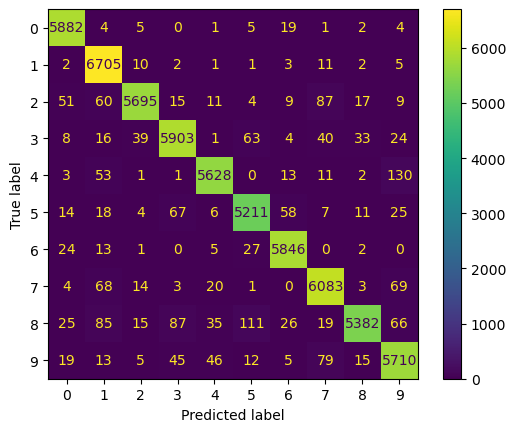

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

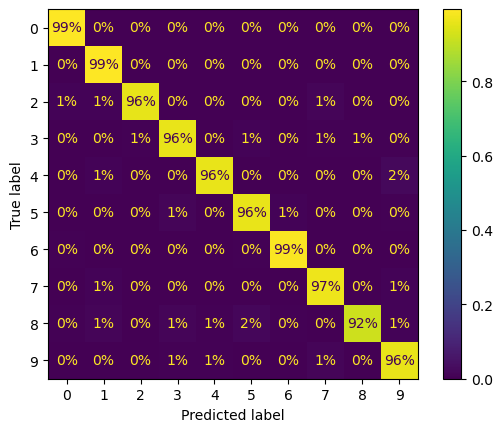

In [ ]:
# Normalized Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format='.0%')

To make errors stand out even more, we can try putting zero weight on the correct predictions

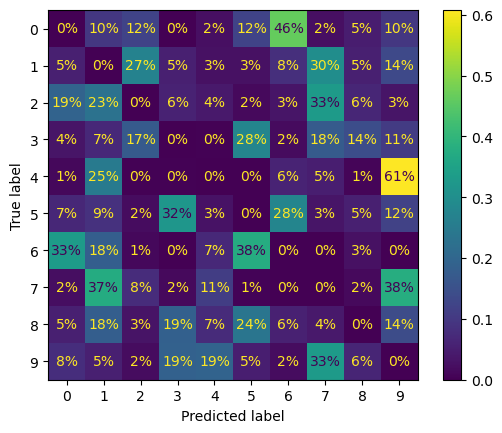

In [68]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize='true', values_format='.0%')

In [86]:
precision_score(y_train, y_train_pred, average='macro'), recall_score(y_train, y_train_pred, average='macro'), accuracy_score(y_train, y_train_pred)

(0.967895609653832, 0.9669341316176434, 0.9674166666666667)

In [ ]:
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
y_test_preds = kn_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_test_preds, average='macro'), recall_score(y_test, y_test_preds, average='macro')

(0.9692753386570571, 0.9684705010297703)

In [95]:
accuracy_score(y_test, y_test_preds)

0.9688